## Pandemic Modeling: The SIR Model!

#### By Elizaveta Pertseva

##  Overview 
An SIR Model is a basic Model which uses differential equations to model the progression of a pandemic over time. In this presentation I will:
1. Review the basis for the model and explain how one can use the Differential Equations in Sage
2. Introduce the SIR Model and the math behind it
3. Show the impact of constants and limitations of the Model
4. Describe some of the possible improvments to the model! 
5. Exercises
##### Sources Used in this Presentation: 
- http://calculuslab.deltacollege.edu/ODE/7-B-1/7-B-1-h.html
- https://jaydaigle.net/blog/the-sir-model-of-epidemics/#fnref:3
- https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4
- https://link.springer.com/content/pdf/10.1007%2F978-1-4614-1686-9_9.pdf
- https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4 
- https://www.maa.org/book/export/html/115606
- https://web.stanford.edu/~jhj1/teachingdocs/Jones-on-R0.pdf

## Review of Differential Equations in Sage
Recall from Math 20C, a differential equation relates functions and derivatives. Ultimately since derivates represent a rate of change, differential equations can help us understand how different varaibles behave and interact over time. As a result differential equations are used in numerous fields including:
- Chemistry : When does a reaction reach equilibrium?  
- Economics : How does the GDP change over time?
- Physics : What is the flow of current through a system?  
- Biology: Population growth & pandemic modeling!

There are also different types of differential equations 
- Ordinary Differential Equation (one independent variable)*
- Partial Differential Equation (multiple independent variables)
- Non Linear Differential Equation  

But for this presentation we only need ODEs! I am also going to use the classic example from biology to show how to solve differential equations in Sage 

## Rabbits v.s Fox Problem : 
Let the following system of equations model the relationship between foxes and rabbits in a park. Let r be the number of rabbits and f be the number of foxes and t represent days
$$ r'(t) = 2r(t) - 0.01r(t)f(t) $$
$$ f'(t) = -f(t) + 0.01r(t)f(t) $$
further let r(0) = 10 and f(0)= 10  

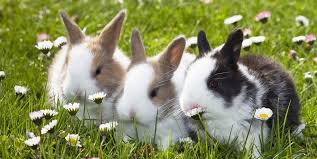

## *********** Participation Check ********************
Using what you know about derivatives and coefficents can you determine what the relationship between rabbits and foxes? (try to put the equations into words, but it is okay if you don't use actual numbers just say increases/decreases)

Answer:
## *******************************    

Note this syetm is actually called a  Lotka-Volterra model but we will not go into details all you have to know is that:  
- rabbit population increases by itself
- the fox population decreases  by itself ( they have nothing to eat!)
- the interaction between foxes and rabbits negatively influences the rabbit population but positively influences the fox population
- we start out with 10 rabbits and 10 foxes  
### We can solve this system by hand using matrices, but we can also solve it using Sage! 

In [1]:
# define our function 
def f(t, Y):
    (r, f) = Y
    dr = 2*r-0.01*r*f
    df = -1*f+0.01*r*f
    return (dr, df)

In [2]:
f(0, (10,10))

(19.0000000000000, -9.00000000000000)

In [3]:
# Set up numerical solution of ODE
solver = ode_solver(function = f,
                    y_0 = (10, 10),
                    t_span = (0, 20),
                    algorithm = 'rk8pd')

In [4]:
# Numerically solve
solver.ode_solve(num_points = 100)

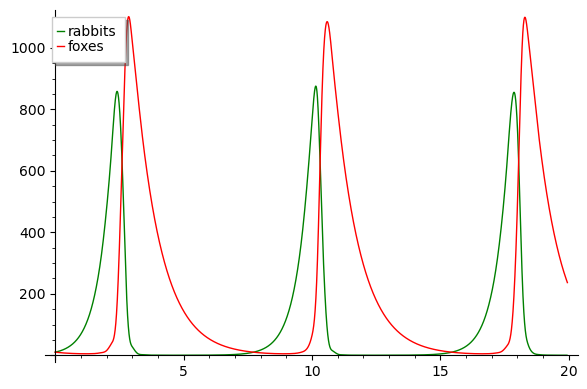

In [5]:
# Plot solution
# we can access each of the equations using i!
show(
     plot(solver.interpolate_solution(i = 0), 0, 20, legend_label = 'rabbits', color = 'green')
    + plot(solver.interpolate_solution(i = 1), 0, 20, legend_label = 'foxes', color = 'red'))

Now we can see how the populations interact over time! Cool! Now how do we use these skills to model a pandemic?

## Introduction to the SIR Model
The SIR model is based on the formula
$$ N_{total} = S_{usceptible} + I_{nfected} + R_{ecovered}   $$
While we keep N or the total population constant the ${\#}$ of people susceptible, infected or recovered varies over time as one person becomes infected and then recovered, thus the formula is better shown by 
$$ N = S(t) + I(t) + R(t)$$ 
where t represents the days passed. Now we are ready to start defining derivatives in order to model how these variables behave over time. 

#### Note This Model Makes Assumptions!
Although we will discuss the limitations of the model later; it is vital to establish some of the assumption the model makes for computational purposes
 - No one "dies" in the model they just turn into Recovered 
 - Once you are Recovered you cannot get sick again ( you can think of model is a one way street ${S \rightarrow I \rightarrow R}$)

Q1: How Quickly do Infected people turn to Recovered ? 
- Ans: For the model we are going to assume that each infected person has an equal chance of recovering each day they are sick. This is modeled by ${\gamma}$. 
$$ \text{ Individual Recovery Rate } = \frac{1}{\text{ average # of days sick}} = \gamma $$
Now on each day I${\gamma}$ people recover from the virus thus since the only way to become recovered is to from infected
$$ \frac{dR}{dt} = \gamma I$$


Q2: How Quickly do Suspetible people get Sick?
- Ans: This number depends on the number of ratio of infected people to total ( ${\frac{I}{N}}$ , how many people a person on average encounters each day and how likely a person is to get sick. The last two are grouped under ${\beta}$.  Thus 
$$ \text{ Individual Infection Rate } = {\frac{\beta I}{N}} $$
it follows that the total number of susceptible people becoming sick is ${\frac{\beta I S}{N}}$ but recall that people becoming sick imples that the number of susptebible people can only decrease, thus 
$$ \frac{dS}{dt} = - {\frac{\beta I S}{N}} $$


Q3: How Quickly does does the number of Infected people Change?
- Ans: we can combine the last two answers to find the derivative of I!
$$ \frac{dI}{dt} = {\frac{\beta I S}{N}} - \gamma I $$

Below Is a Quick Summary of our findings:


<img src="model.PNG" width="50%"> 


### Aside  
In pandemic modeling there is also a very important constant called R0 which is produced by ${\frac{\beta}{\gamma}}$. This number models how many people each person infects! Note that 
$$ R_0 > 1 \rightarrow \text{pandemic spreads}$$
$$ R_0 < 1 \rightarrow \text{pandemic declines}$$
Now we are ready to build our model by combining the skills we learned!


## *********** Participation Check 2 ********************
Using what we learned from the Rabbit/ Fox problem define an SIR_f(t,Y) function that we are going to use in our ode_solver:

In [6]:
# This is the answer: 
def SIR_f(t, Y):
        (S, I, R) = Y
        dS = - beta * S * I / N
        dI = beta * S * I / N - gamma * I
        dR = gamma * I
        return (dS, dI, dR)

## *******************************    

In [7]:
# Now Lets define our function for SRE Model! 
# Note this code is taken from Jay Diagle and then modified into a function with parameters

def SIR(R0,gamma, IInit ,RInit, N ,tMax):
    # Note IInit and RInit represent inital infected/recovered
    # N represents total number of people in our model
    # tMax represents the duration of time that we want to model on
    
    SInit = N - IInit - RInit
    beta = gamma * R0
    
    # We are putting the definition of your equation here!
    def SIR_f(t, Y):
        (S, I, R) = Y
        dS = - beta * S * I / N
        dI = beta * S * I / N - gamma * I
        dR = gamma * I
        return (dS, dI, dR)
    
    # Set up numerical solution of ODE
    solver = ode_solver(function = SIR_f,
                    y_0 = (SInit, IInit, RInit),
                    t_span = (0, tMax),
                    algorithm = 'rk8pd')
    

    # Numerically solve
    solver.ode_solve(num_points = 1000)

    # Plot solution
    show(
         plot(solver.interpolate_solution(i = 0), 0, tMax, legend_label = 'Suseptible', color = 'green')
       + plot(solver.interpolate_solution(i = 1), 0, tMax, legend_label = 'Infected', color = 'red')
       + plot(solver.interpolate_solution(i = 2), 0, tMax, legend_label = 'Recovered', color = 'blue')
    )

In [8]:
# Let us define the parameters for COVID 19 in U.S using 
# data from https://www.worldometers.info/coronavirus/country/us/

# When Covid first started we believed it had an R0 = 2.5 and incubation rate was 14 days
R0 = 2.5
gamma = 0.07

# The population size of U.S is about 328.2 million according to United States Cenusus Beureu 
N = 328200000

# On Febuary 28, 2020 there were 0 deaths from Covid (we are going to assume 0 recovered) and 57 active cases
IInit = 57
RInit = 0

# Lets try to figure what will happen over the course of one year
tMax = 365


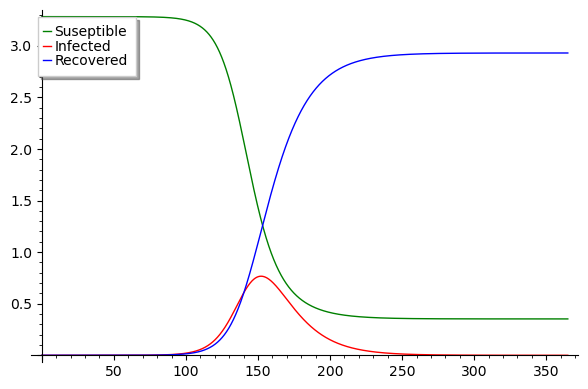

In [9]:
#Now we can run our model
SIR(R0,gamma, IInit ,RInit, N ,tMax)

# We have build our first SIR model! Good Job!
## *********** Participation Check 3 ********************
What does the model say about the progression of cases?

Answer: 
## *******************************    

Luckily this is not what actually happened... On Feburary 28, 2021 there were in total only 29 million total cases. But why was our model so off? This brings us to

##  Impact of Constants/Limitations of the SIR Model
Ultimately there was a lot we did not know about COVID 19 when it first started. What if R0 was 1.5?

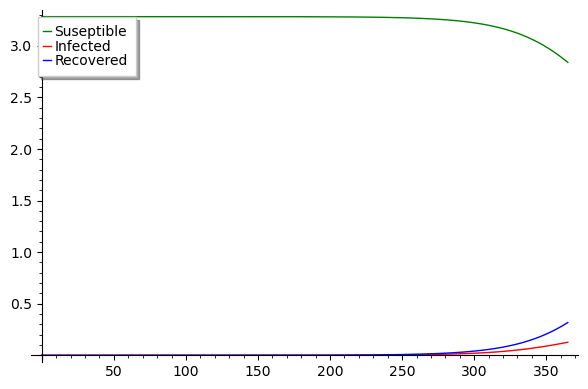

In [10]:
SIR(1.5,gamma, IInit ,RInit, N ,tMax)

Ooops? What happened here? Let us Increase t to see 

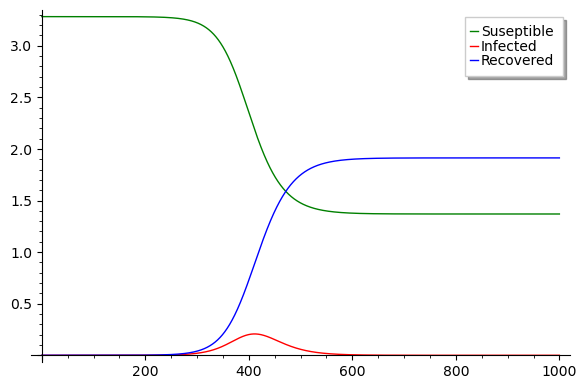

In [11]:
SIR(1.5,gamma, IInit ,RInit, N ,1000)

As you can see this lowered the number of people who got sick by soo much. Additionally it flatenned the curve! Now what if the incubation period for COVID 19 was not 14 days but 5 days? 

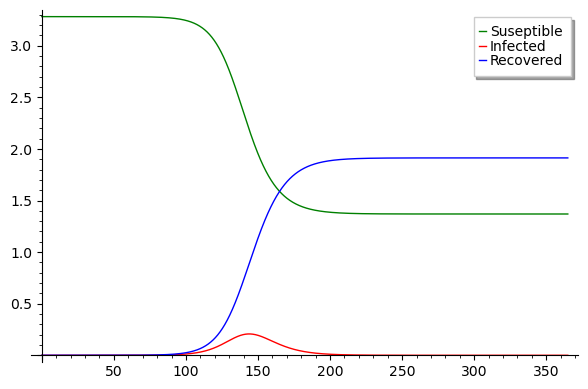

In [12]:
SIR(1.5, 1/5, IInit ,RInit, N ,tMax)

Hmm the number of people getting sick did not seem to change drastically but the peak of the pandemic shifted to earlier. Now what about the conspiracy theory that there were some people who were already sick with COVID. What if 20% of our population was already secretly recovered?

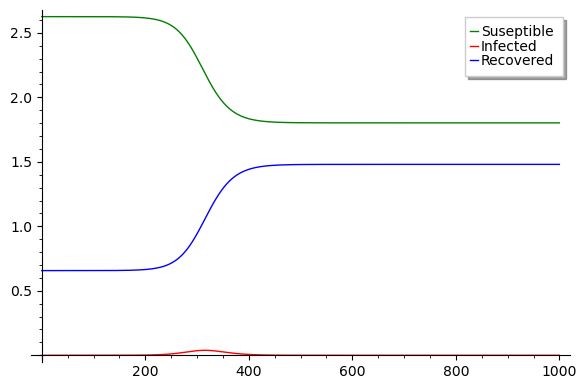

In [13]:
SIR(1.5, 1/5, IInit ,65640000, N ,1000)

 Ultimately Our model now perdicts that a lot less people will get sick! (Change in susceptiable population) Nonethless this Model no matter the changes we made still grossely overestimates the number of people who got sick (possibly our R0 is off? there is actually a big debate about the true R0 of COVID). This brings me to 

### Limitations of the SIR Model
- No one can get sick twice in the model 
- It does not account for a changing R0: this can be caused by social distancing measures or people getting fed up with social distancing measures 
- It does not account for deaths or births in a population; while this would not impact a large N it would impact if tried to use this model to model COVID in a small town. Or if we tried to model a progression of a diseases over a long period of time 
- It does not account for vaccination or people being immune to COVID
- It does not account for exposure ( people being exposed before they become sick and can infect others)

##  Improvements to the SIR Model
Thus over time there have been improvements proposed to the SIR model!  
Common Improvements include  
1) Introduction of New Variables 
- SIRD Model : Adding Deaths from the Diseases 
- SEIR Model : Adding the Exposed but not yet infected population
- SIRV model : Adding Vaccinated to the model 
2) Introduction of New Relationship between Variables
- Adding  Births & Deaths to the Model(S increases and decreases while all other variables decrease) 
- Allowing some of the recovered to turn into those Infected
- Adding seasonality 
3) A combination of both! 

## *********** Participation Check 4 ********************
Can you think of any other variables or relationships one might add to the model?

Answer: 
## *******************************    

The More Complicated the uses of the model, the more complicated the additions. Below is a diagram showing a model used for the co-infection of dengue and leptospirosis!  
Note: One can combine two SIR models to study co infections in one population by having one S but multiple I's. But this a little bit beyond the scope of this presentation

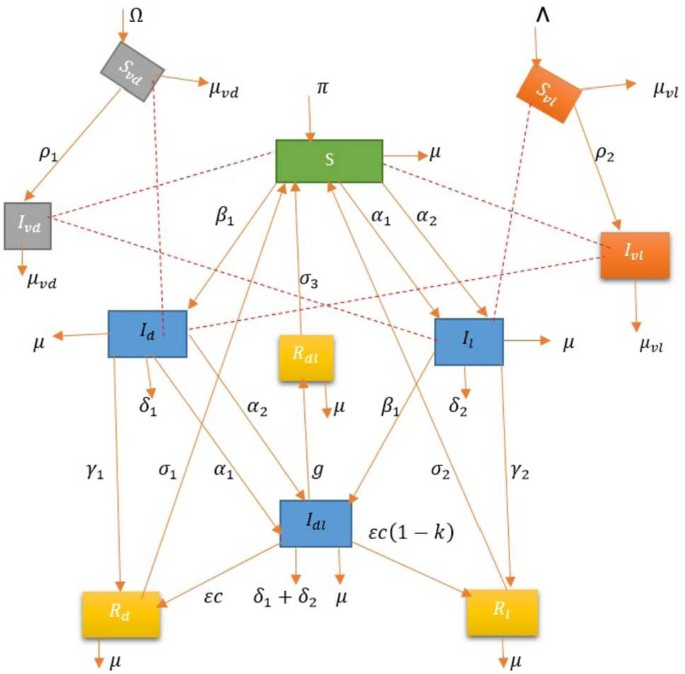 


### Time Permitting: Example of Adding New Variables 
But let us start out with something a bit simpler; here is an example of how one would add just one new variable  
Let D which model the number of Deaths from the diseases. We will also introduce the variables ${p}$= time frame during which people die (aka  lets say people only die during the first week of COVID, but if they survived at least 7 days they will not die) and ${a}$= percent of people that die from our diesease now our new equations become .
$$ \frac{dI}{dt} = {\frac{\Beta I S}{N}} - (1-a)\gamma I - apI $$
$$ \frac{dR}{dt} = (1-a)\gamma I $$
$$ \frac{dD}{dt} = a p I $$
Note we pretty much split the Recovered category into 2 using a.


In [14]:
def SIRD(R0,gamma, IInit ,RInit, N ,tMax, p, a ):
    # I am going to asume our intial Dead is zero for simplicity
    SInit = N - IInit - RInit
    beta = gamma * R0
    
    # Now let us define our function
    def SIR_f(t, Y):
        (S, I, R, D) = Y
        dS = - beta * S * I / N
        dI = beta * S * I / N - (1-a)*gamma * I - a *p * I
        dR = (1-a)*gamma * I
        dD = a * p * I
        return (dS, dI, dR, dD)
    
    # Set up numerical solution of ODE
    solver = ode_solver(function = SIR_f,
                    y_0 = (SInit, IInit, RInit,0),
                    t_span = (0, tMax),
                    algorithm = 'rk8pd')
    

    # Numerically solve
    solver.ode_solve(num_points = 1000)

    # Plot solution
    show(
         plot(solver.interpolate_solution(i = 0), 0, tMax, legend_label = 'Suseptible', color = 'green')
       + plot(solver.interpolate_solution(i = 1), 0, tMax, legend_label = 'Infected', color = 'red')
       + plot(solver.interpolate_solution(i = 2), 0, tMax, legend_label = 'Recovered', color = 'blue')
        # Add a new plot
       + plot(solver.interpolate_solution(i = 3), 0, tMax, legend_label = 'Dead', color = 'orange')
    )

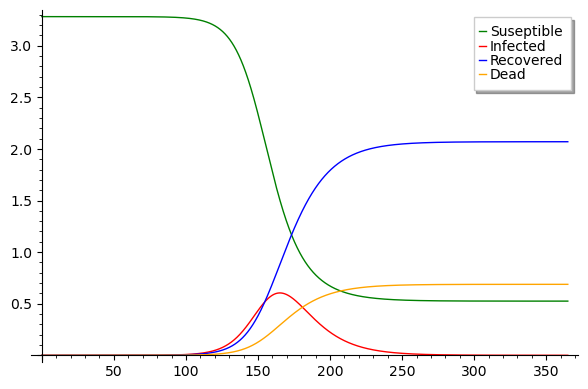

In [15]:
# Assuming if you survived at least one week you will not die and COVID has about 14% mortality rate (this was true in Italy during the peak of the epidemic)
SIRD(R0,gamma, IInit ,RInit, N ,tMax, 1/7, 0.14)

### Time Permitting:  Creative Uses of the SIR Model
In recent years there has been more reaserch on using the SIR model for non pandemic use! Some examples include 
- Online Social Networks: study how Misinformation is spread 
- Viral Marketing: study how Marketing message goes viral
- P2P Networks: study how quickly a file can be shared
- Computer Viruses 

As well as others here is a good source : https://core.ac.uk/download/pdf/78556409.pdf

## Exercises

## Problem 1 : Importance of R0
In this Problem we are going to try and estimate the initial R0 for COVID 19 by looking at data from Hawaii and Colorado when the pandemic first happened! ( the data was taken from https://www.worldometers.info/coronavirus/usa/). In the folder there are two csv documents. Labelled "Hawaii.csv" and "Colorado.csv" which contain the active cases in both states during the week of Week of March 16th - March 22nd.  
a) Load the data and graph it. Although you can use any function you want; I would suggest using the scatter_plot() function from Sage as it makes next parts easier. What are your initial observations? What policy would you entact in Hawaii v.s Colorado?

In [16]:
import pandas as pd

b) Now using the model SIR model we build, play around with the R0 parameter for Hawaii and Colorado and try to macth them to the curve. Assume that COVID 19 lasts about 14 days and Hawaii has a population of 1,407,006 while Colorado has a population 5,759,000. Now what policy would you entact in Hawaii v.s Colorado? 
* Hint: it might be helpful to modify the function we build in lecture to only return the active case plot

c) Add the two data sets together and play around with R0 untill the curve matches. What policy would you entact in the entire U.S?    

From the above two exercisizes one can see that R0 is a fairly susceptible metric that can change when averaged over different populations ( Further the intial perdicted r0 for COVID 19 was much much worse than the reality, there is currently still a  large debate for the true COVID 19 R0: Here is a great website showcasing some of the R0 across the U.S (note the variance!) https://covid19-projections.com/infections-tracker/) If it is so easy to get R0 wrong then why do we care about it? Because it helps us determine the size of the pandemic!   

d)Calculate the derivative of the number infected over the number of suseptible ${\frac{dI}{dS}}$ 

Ans:

e)Now solve the equation by moving each derivative to one side and integrating from ${(0 , \infty)}$. Assume that ${I(\infty) = I(0)= 0 }$ and S(0) = N. You should end up with the form ${\frac{S(\infty)}{N}}$ in terms of R0, N and ${S(\infty)}$. This is  the ratio of the population that will get sick and as equation shows it fully depends on R0!
* Note this equation is actually most commonly used to calculate R0 post end of the pandemic, but sadly COVID has not ended yet.

Ans:

## Problem 2: How Do we End/Prevent a Pandemic?
This problem is partly inspired by https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4  who models a changing R0.
Let us create our own modification to the SIR model! In this problem we are going to try and stimulate Vaccinations over time.   
2a. If we were going to add a variable p that will indicate the percentage of the Susceptible population getting vaccinated each day how would it change our equations? ( We are assuming we will not vaccinate those infected as they will be at home sick and we will not vaccinate those recovered since for this model you cannot get sick twice)
* Hint Create a new variable V and figure out its derivative + change S accordingly 

Ans:

2b. Nice! Now add it to our model as see what happens if we vaccinate about .2 percent of our population every day. 

2c. Wow we avoided the Pandemic! But recall that we did not start vaccinating right away. Create a function p(t) that models us starting to vaccinate 2 percent of the population per day after four months, add it to the model and see what happens. (This is a hypothetical scenario)

2d. Oops Pandemic not avoided! Note that the way vaccines try to stop a pandemic is by decreasing the susceptible population. Lets try and calculate a ${S_0}$ (depending on R0 and N) that would hypothetically stop the pandemic. This once again shows the importance of R0
* Hint what must be true about ${\frac{dI(0)}{dt}}$ so the pandemic does not start?  

## Solutions

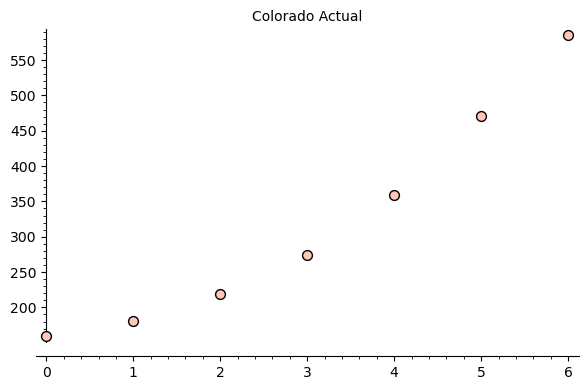

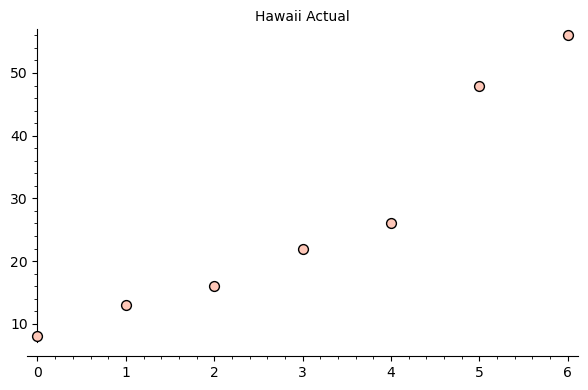

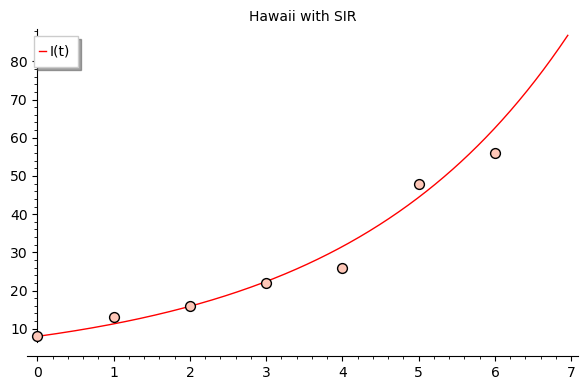

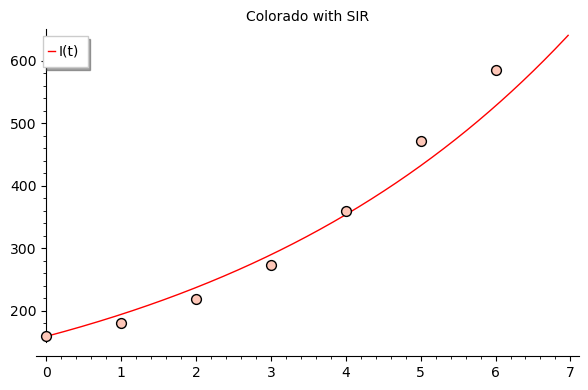

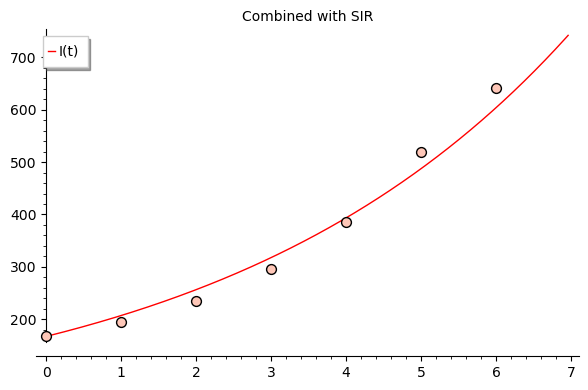

In [17]:
# Solution to Problem #1
#1a. 
import pandas as pd
C = pd.read_csv('Colorado.csv')
show(scatter_plot(C.to_numpy(), title = 'Colorado Actual'))
H = pd.read_csv('Hawaii.csv')
show(scatter_plot(H.to_numpy(), title = 'Hawaii Actual'))
# It seems as though Hawaii has a lot less cases than Colorado. One possibility as a policy maker would be to impose 
# social distancing rules in Colorado and not Hawaii

#1b
# below is a modfied version of the SIR function 
def SIR_active(R0,gamma, IInit ,RInit, N ,tMax):
    SInit = N - IInit - RInit
    beta = gamma * R0
    def SIR_f(t, Y):
        (S, I, R) = Y
        dS = - beta * S * I / N
        dI = beta * S * I / N - gamma * I
        dR = gamma * I
        return (dS, dI, dR)
    solver = ode_solver(function = SIR_f,
                    y_0 = (SInit, IInit, RInit),
                    t_span = (0, tMax),
                    algorithm = 'rk8pd')
    solver.ode_solve(num_points = 1000)
    # Only return the active cases
    return plot(solver.interpolate_solution(i = 1), 0, tMax, legend_label = 'I(t)', color = 'red')

# After changing the R0 constant one would get it to be around R0= 5.8
# Also note that one needs to inspect the data frame in order to get the Rinit paramter! 
s = scatter_plot(H.to_numpy(), title = 'Hawaii with SIR')
show(s+SIR_active(5.8 ,1/14, 8 ,0, 1407006 ,7))

# After changing the R0 constant one would get it to be around R0= 3.8
# Also note that one needs to inspect the data frame in order to get the Rinit paramter! 
s = scatter_plot(C.to_numpy(), title = 'Colorado with SIR')
show(s+SIR_active(3.8,1/14, 159 ,0, 5759000 ,7))
# Now one can see that the situtation in the Hawaii is much worse than in Coloroda as the R0 is extreme. Policies should be stricter in Hawaii than in Colorado, but both should be very strict.

#1c
Total = pd.DataFrame() 
Total['Time'] = H['Time']
Total['Active Cases'] = H['Active Cases'] + C['Active Cases']
s = scatter_plot(Total.to_numpy(), title = 'Combined with SIR')
show(s+SIR_active(4,1/14,159 + 8,0, 5759000 + 1407006, 7))
# Note R0 was a lot lower than Hawaii as Hawaii has a smaller population than Colorado! Thus averaging R0 over different states might lead a policy maker to think a pandemic is not as bad in one place as it actually is! Nonethless the entire U.S should quarantine.

# solutions to 1D and 1E are after the plots

1d. Dividing the two equations by each other we get 
$$ \frac{dI}{dS} = \frac{\frac{ \beta IS}{N} - \gamma I}{-\frac{\beta IS}{N}}$$
$$ \frac{dI}{dS} = -1 + \frac{N \gamma}{\beta S} $$

1e. 
$$ \int_0^{\infty} dI = \int_0^{\infty} -dS + \frac{dS N \gamma}{\beta S}$$
$$ I(\infty) - I(0) = - S(\infty) + S(0) + \frac{N \gamma}{beta}ln(S(\infty)) - \frac{N \gamma}{beta}ln(S(0)) $$ 
then plugging in constants and using the fact that ${ln(x) -ln(y) = ln(\frac{x}{y})}$
$$  0 = - S(\infty) + N + \frac{N \gamma}{beta}ln(\frac{S(\infty)}{N})  $$
$$ \frac{S(\infty)}{N} - 1  = \frac{1}{R0} ln(\frac{S(\infty)}{N}) $$
$$ R0(\frac{S(\infty)}{N} - 1) = ln(\frac{S(\infty)}{N}) $$
$$ e^{R0(\frac{S(\infty)}{N} - 1))} = \frac{S(\infty)}{N}  $$
* Note there are different variations of this equation used for different purpouses but this is the one I understood best



Solution to Problem 2:  
2a. $$ \frac{dS}{dt} =  - {\frac{\beta I S}{N}} - p*S $$
    $$ \frac{dV}{dt} = pS $$

In [18]:
# Solution to 2b
def SIRV(R0,gamma, IInit ,RInit, N ,tMax,p):
    # Note IInit and RInit represent inital infected/recovered
    # N represents total number of people in our model
    # tMax represents the duration of time that we want to model on
    
    SInit = N - IInit - RInit
    beta = gamma * R0
    
    # Now let us define our function
    def SIR_f(t, Y):
        (S, I, R,V) = Y
        dS = - beta * S * I / N  - p*S
        dI = beta * S * I / N - gamma * I
        dR = gamma * I
        dV = p*S
        return (dS, dI, dR, dV)
    
    # Set up numerical solution of ODE
    solver = ode_solver(function = SIR_f,
                    y_0 = (SInit, IInit, RInit,0),
                    t_span = (0, tMax),
                    algorithm = 'rk8pd')
    

    # Numerically solve
    solver.ode_solve(num_points = 1000)

    # Plot solution
    show(
         plot(solver.interpolate_solution(i = 0), 0, tMax, legend_label = 'Suseptible', color = 'green')
       + plot(solver.interpolate_solution(i = 1), 0, tMax, legend_label = 'Infected', color = 'red')
       + plot(solver.interpolate_solution(i = 2), 0, tMax, legend_label = 'Recovered', color = 'blue')
       + plot(solver.interpolate_solution(i = 3), 0, tMax, legend_label = 'Vaccinated', color = 'yellow')
    )

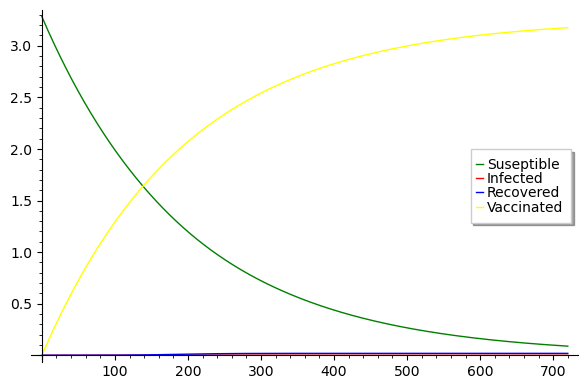

In [19]:
SIRV(R0,gamma, IInit ,RInit, N ,720, 0.005)

In [20]:
# Solution to 2c 
def p(t):
    if t > 120:
        return 0.005
    else:
        return 0

def SIRVt(R0,gamma, IInit ,RInit, N ,tMax):
    # Note IInit and RInit represent inital infected/recovered
    # N represents total number of people in our model
    # tMax represents the duration of time that we want to model on
    
    SInit = N - IInit - RInit
    beta = gamma * R0
    
    # Now let us define our function
    def SIR_f(t, Y):
        (S, I, R,V) = Y
        dS = - beta * S * I / N  - p(t)*S
        dI = beta * S * I / N - gamma * I
        dR = gamma * I
        dV = p(t)*S
        return (dS, dI, dR, dV)
    
    # Set up numerical solution of ODE
    solver = ode_solver(function = SIR_f,
                    y_0 = (SInit, IInit, RInit,0),
                    t_span = (0, tMax),
                    algorithm = 'rk8pd')
    

    # Numerically solve
    solver.ode_solve(num_points = 1000)

    # Plot solution
    show(
         plot(solver.interpolate_solution(i = 0), 0, tMax, legend_label = 'Suseptible', color = 'green', ticks=[90,None])
       + plot(solver.interpolate_solution(i = 1), 0, tMax, legend_label = 'Infected', color = 'red')
       + plot(solver.interpolate_solution(i = 2), 0, tMax, legend_label = 'Recovered', color = 'blue')
       + plot(solver.interpolate_solution(i = 3), 0, tMax, legend_label = 'Vaccinated', color = 'yellow')
    )

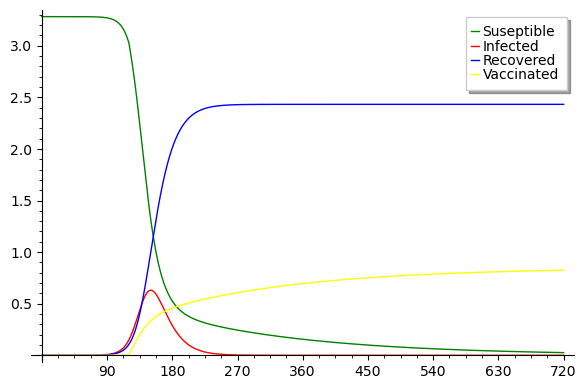

In [21]:
SIRVt(R0,gamma, IInit ,RInit, N ,720)

2d. A pandemic begins when ${\frac{dI}{dt}}$ is positive and declines when it is negative. However since ${\frac{dS}{dt}}$ is always negative it follows that the ${\frac{\beta I S}{N}}$ term is biggest at t = 0 and will always decrease afterwards. This means that if ${\frac{dI}{dt} \leq 0}$  at t=0, there will never be an increase in infections. From this we get 
$$ \frac{dI(0)}{dt} = {\frac{\beta I(0) S(0)}{N}} - \gamma I(0) $$
$$ 0 \geq I(0)(\frac{\beta S(0)}{N} - \gamma)$$
Assuming I(0) is not zero 
$$ 0 \geq (\frac{\beta I(0) S(0)}{N} - \gamma) $$
$$ \frac{\gamma N}{\beta } \geq S(0)  $$
$$ \frac{N}{(R0)} \geq S(0) $$